<a href="https://colab.research.google.com/github/jayuan101/Crime-Predication-/blob/main/Project_Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# *** Google Colab Prep ***#
from google.colab import drive
drive.mount('/content/drive')
drive.mount('/content/NYPD_Complaint_Data_Historic.csv')

Mounted at /content/drive
Mounted at /content/NYPD_Complaint_Data_Historic.csv


# import library

In [5]:
# simplify the package in a short name. Below are the standard names people use for Pandas, Numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import plotly.express as px
%matplotlib auto
%matplotlib inline
# from fbprophet import Prophet

Using matplotlib backend: agg


#Importing CSV files

In [6]:
# import dataset with the read_csv function from pandas, giving it the URL for CSV file, and assigning the resulting dataframe to data_crime.
data_crime = pd.read_csv('/content/NYPD_Complaint_Data_Historic.csv/MyDrive/NYPD_Complaint_Data_Historic.csv' ,low_memory = False)
types = data_crime.OFNS_DESC.unique()

In [7]:
crime_map = pd.read_csv('/content/NYPD_Complaint_Data_Historic.csv/MyDrive/Crime_Map_.csv')

# Previewing dataframes

In [8]:
data_crime

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,744350707,12/17/2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,916.0,...,NaN,NaN,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
7825495,380927470,06/05/2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,450.0,...,M,NaN,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,NaN,25-44,BLACK,M
7825496,502083804,02/10/2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,339.0,...,U,NaN,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,NaN,45-64,BLACK,F
7825497,609916130,12/11/2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,U,NaN,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,NaN,<18,BLACK,M


In [9]:
print(str(types))

['DANGEROUS WEAPONS' 'FORGERY' 'HARRASSMENT 2' 'MISCELLANEOUS PENAL LAW'
 'MURDER & NON-NEGL. MANSLAUGHTER' 'BURGLARY' 'DANGEROUS DRUGS'
 'PETIT LARCENY' 'OFF. AGNST PUB ORD SENSBLTY &' 'GRAND LARCENY'
 'FELONY ASSAULT' 'ASSAULT 3 & RELATED OFFENSES' 'ARSON' 'RAPE'
 'SEX CRIMES' 'GRAND LARCENY OF MOTOR VEHICLE' 'ROBBERY'
 'CRIMINAL MISCHIEF & RELATED OF' 'THEFT-FRAUD' 'VEHICLE AND TRAFFIC LAWS'
 'CRIMINAL TRESPASS' 'OFFENSES INVOLVING FRAUD' 'FRAUDS'
 'OFFENSES AGAINST PUBLIC ADMINI' 'OFFENSES AGAINST THE PERSON'
 'ADMINISTRATIVE CODE' 'INTOXICATED & IMPAIRED DRIVING' 'ESCAPE 3'
 'NYS LAWS-UNCLASSIFIED FELONY' 'POSSESSION OF STOLEN PROPERTY'
 'THEFT OF SERVICES' 'KIDNAPPING & RELATED OFFENSES'
 'OTHER OFFENSES RELATED TO THEF' 'UNAUTHORIZED USE OF A VEHICLE'
 "BURGLAR'S TOOLS" 'ENDAN WELFARE INCOMP' 'FRAUDULENT ACCOSTING'
 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED' 'OTHER STATE LAWS (NON PENAL LA'
 'OFFENSES AGAINST PUBLIC SAFETY' 'GAMBLING'
 'PETIT LARCENY OF MOTOR VEHICLE' 'ALCOHOLIC BEV

In [10]:
crime_map

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,JURIS_DESC,...,PARKS_NM,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,240211996,40,BRONX,06/05/2021,19:23:00,NaN,(null),COMPLETED,(null),N.Y. TRANSIT POLICE,...,(null),273.0,"TAMPERING 1,CRIMINAL",TRANSIT - NYC SUBWAY,02/07/2022,1005028,234516,40.810352,-73.924942,"(40.8103518634571, -73.924942325642)"
1,238497788,7,MANHATTAN,01/01/2022,04:00:00,01/01/2022,06:00:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),157.0,RAPE 1,RESIDENCE - APT. HOUSE,01/01/2022,988917,200245,40.716310,-73.983166,"(40.7163099917327, -73.9831660136947)"
2,243004090,105,QUEENS,01/01/2019,00:00:00,12/31/2019,23:59:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),175.0,"SEXUAL ABUSE 3,2",RESIDENCE-HOUSE,04/02/2022,1057738,204079,40.726529,-73.734865,"(40.7265293769835, -73.7348645378882)"
3,243090517,47,BRONX,03/01/2020,00:01:00,12/31/2020,23:59:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),739.0,"FRAUD,UNCLASSIFIED-FELONY",RESIDENCE-HOUSE,04/02/2022,1025177,268368,40.903188,-73.851944,"(40.903188, -73.851944)"
4,245183845,94,BROOKLYN,05/16/2000,20:00:00,05/28/2005,00:00:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),157.0,RAPE 1,RESIDENCE - APT. HOUSE,05/15/2022,997282,204143,40.727001,-73.952983,"(40.7270006940205, -73.9529831112437)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209824,245890874,75,BROOKLYN,05/31/2022,17:45:00,05/31/2022,17:46:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),101.0,ASSAULT 3,GAS STATION,05/31/2022,1020932,185703,40.676313,-73.867754,"(40.676313, -73.867754)"
209825,245956536,104,QUEENS,05/31/2022,14:15:00,05/31/2022,14:30:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,05/31/2022,1013160,197457,40.708604,-73.895723,"(40.708604, -73.895723)"
209826,246008200,25,MANHATTAN,05/31/2022,21:00:00,06/02/2022,21:15:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",BRIDGE,05/31/2022,1002640,231748,40.802751,-73.933575,"(40.80275148, -73.93357496)"
209827,245914266,67,BROOKLYN,05/31/2022,19:37:00,05/31/2022,19:55:00,COMPLETED,(null),N.Y. POLICE DEPT,...,(null),638.0,"HARASSMENT,SUBD 3,4,5",RESIDENCE - APT. HOUSE,05/31/2022,997513,174246,40.644932,-73.952204,"(40.644932, -73.952204)"


In [11]:
# grouping 'BORO_NM', and then aggregate dataframe by values ​​of CMPLNT_NUM and counts and show it.
boro_cries = data_crime.groupby(['BORO_NM']).agg({'CMPLNT_NUM':'count'})

# sort the rows data in dataframe to see the number of crimes from high to low
top_crimes = boro_cries.sort_values('CMPLNT_NUM', ascending=False)

top_crimes.head() 


,CMPLNT_NUM
BORO_NM,
BROOKLYN,2313143
MANHATTAN,1882292
BRONX,1693981
QUEENS,1561712
STATEN ISLAND,361891


In [12]:
# Calculate the proportion of crime rate in each region as a whole
top_crimes_prop = top_crimes.assign(propotion = top_crimes.CMPLNT_NUM / sum(top_crimes.CMPLNT_NUM))

top_crimes_prop = top_crimes_prop.reset_index()

In [13]:
# Extracting information from the streetnames
for i in data_crime['PREM_TYP_DESC'][0:10]:
    print(i)

STREET
STREET
STREET
STREET
nan
RESIDENCE - APT. HOUSE
STREET
STREET
STREET
STREET


In [14]:
data_crime.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1744294
CMPLNT_TO_TM         1739479
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18832
PD_CD                   6761
PD_DESC                 6761
CRM_ATPT_CPTD_CD         168
LAW_CAT_CD                 0
BORO_NM                12480
LOC_OF_OCCUR_DESC    1618063
PREM_TYP_DESC          42015
JURIS_DESC                 0
JURISDICTION_CODE       6761
PARKS_NM             7794644
HADEVELOPT           7477110
HOUSING_PSA          7226206
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4883369
SUSP_RACE            3514828
SUSP_SEX             3648142
TRANSIT_DISTRICT     7653024
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             7218
STATION_NAME         7653024
VIC_AGE_GROUP        1638445
VIC_RACE                 390
VIC_SEX       

In [15]:
# Replacing the NaN values of the text column with the corresponding title value 
data_crime.fillna(0)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,0,0,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,0,0.0,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,0,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,0,0.0,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,0,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,0,0,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,0.0,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,0,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,0,0,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,0.0,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,0,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,0,0,0.0,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,0.0,...,0,0.0,40.698827,-73.938819,"(40.698827283, -73.938819047)",0,0,25-44,BLACK,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825494,744350707,12/17/2018,03:00:00,12/17/2018,03:05:00,47.0,12/17/2018,348,VEHICLE AND TRAFFIC LAWS,916.0,...,0,0.0,40.887333,-73.847250,"(40.887332818, -73.847250013)",PATROL BORO BRONX,0,25-44,WHITE HISPANIC,F
7825495,380927470,06/05/2018,23:30:00,06/06/2018,11:00:00,43.0,06/07/2018,110,GRAND LARCENY OF MOTOR VEHICLE,450.0,...,M,0.0,40.827414,-73.877946,"(40.827414051, -73.877945775)",PATROL BORO BRONX,0,25-44,BLACK,M
7825496,502083804,02/10/2018,08:30:00,02/10/2018,08:45:00,42.0,02/10/2018,341,PETIT LARCENY,339.0,...,U,0.0,40.834528,-73.903836,"(40.834528146, -73.903836069)",PATROL BORO BRONX,0,45-64,BLACK,F
7825497,609916130,12/11/2018,07:30:00,12/11/2018,07:50:00,32.0,12/11/2018,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,U,0.0,40.811812,-73.938329,"(40.81181176, -73.938328651)",PATROL BORO MAN NORTH,0,<18,BLACK,M


In [16]:
data_crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [17]:
print('The shape of our features is:', data_crime.shape)

The shape of our features is: (7825499, 35)


In [18]:
# Descriptive statistics for each column
data_crime.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,TRANSIT_DISTRICT,Latitude,Longitude
count,7.825499e+06,7.823333e+06,7.825499e+06,7.818738e+06,7.818738e+06,172475.000000,7.808160e+06,7.808160e+06
mean,5.500321e+08,6.334306e+01,2.968756e+02,4.126822e+02,7.088369e-01,13.605833,4.073517e+01,-7.392551e+01
std,2.597822e+08,3.450825e+01,1.511127e+02,2.176568e+02,6.648380e+00,12.475836,8.609054e-02,7.825796e-02
min,1.000001e+08,1.000000e+00,1.010000e+02,1.000000e+02,0.000000e+00,1.000000,4.011271e+01,-7.751921e+01
25%,3.250977e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,3.000000,4.067280e+01,-7.397287e+01
50%,5.500406e+08,6.300000e+01,3.410000e+02,3.800000e+02,0.000000e+00,11.000000,4.073236e+01,-7.392721e+01
75%,7.750019e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,30.000000,4.081215e+01,-7.388291e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,34.000000,5.965727e+01,-7.368479e+01


In [19]:
#dropping rows with NaN values
data_crime.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC'], inplace=True)

#dropping columns that are not significant for future data exploration
data_crime.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

data_crime.drop(['PREM_TYP_DESC','SUSP_AGE_GROUP','SUSP_SEX','SUSP_RACE','JURISDICTION_CODE'], axis='columns', inplace=True)

data_crime.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
data_crime.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
data_crime.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
data_crime.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
data_crime.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", data_crime.shape[0])
print("Variables: ", data_crime.shape[1])

Clean dataset: 
Observations:  7776644
Variables:  19


In [20]:
#examing the changes
data_crime.head(5)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,12/31/2019,118,DANGEROUS WEAPONS,COMPLETED,FELONY,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,"999,937","238,365",40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,113,FORGERY,COMPLETED,FELONY,BRONX,UNKNOWN,N.Y. POLICE DEPT,"1,022,508","261,990",40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,12/29/2019,578,HARRASSMENT 2,COMPLETED,VIOLATION,QUEENS,FRONT OF,N.Y. POLICE DEPT,"1,034,178","209,758",40.742281,-73.819824,"(40.74228115600005, -73.81982408)",25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,12/28/2019,126,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,N.Y. POLICE DEPT,"1,026,412","258,211",40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",UNKNOWN,UNKNOWN,E
5,293718737,12/27/2019,22:00:00,12/27/2019,107,BURGLARY,ATTEMPTED,FELONY,MANHATTAN,FRONT OF,N.Y. POLICE DEPT,"989,665","201,866",40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",UNKNOWN,UNKNOWN,M


In [21]:
data_crime.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARRASSMENT 2',
       'MISCELLANEOUS PENAL LAW', 'BURGLARY', 'DANGEROUS DRUGS',
       'PETIT LARCENY', 'OFF. AGNST PUB ORD SENSBLTY &', 'GRAND LARCENY',
       'FELONY ASSAULT', 'ASSAULT 3 & RELATED OFFENSES', 'ARSON', 'RAPE',
       'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE', 'ROBBERY',
       'CRIMINAL MISCHIEF & RELATED OF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING',
       'ESCAPE 3', 'NYS LAWS-UNCLASSIFIED FELONY',
       'POSSESSION OF STOLEN PROPERTY', 'THEFT OF SERVICES',
       'KIDNAPPING & RELATED OFFENSES', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', "BURGLAR'S TOOLS",
       'ENDAN WELFARE INCOMP', 'FRAUDULENT ACCOSTING',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED',
       'OTHER STATE LAWS 

In [22]:
data_crime_clean = data_crime.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

In [23]:
data_crime_clean.OFNS_DESC.unique()

array(['DANGEROUS WEAPONS', 'FORGERY', 'HARASSMENT',
       'MISCELLANEOUS PENAL LAW', 'BURGLARY', 'DANGEROUS DRUGS',
       'PETIT LARCENY', 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
       'GRAND LARCENY', 'FELONY ASSAULT', 'ASSAULT & RELATED OFFENSES',
       'ARSON', 'RAPE', 'SEX CRIMES', 'GRAND LARCENY OF MOTOR VEHICLE',
       'ROBBERY', 'CRIMINAL MISCHIEF', 'THEFT-FRAUD',
       'VEHICLE AND TRAFFIC LAWS', 'CRIMINAL TRESPASS',
       'OFFENSES INVOLVING FRAUD', 'FRAUDS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'INTOXICATED & IMPAIRED DRIVING', 'ESCAPE',
       'NYS LAWS-UNCLASSIFIED FELONY', 'POSSESSION OF STOLEN PROPERTY',
       'THEFT OF SERVICES', 'KIDNAPPING & RELATED OFFENSES',
       'OTHER OFFENSES RELATED TO THEF', 'UNAUTHORIZED USE OF A VEHICLE',
       "BURGLAR'S TOOLS", 'ENDANGERING WELFARE OF INCOMPETENT',
       'FRAUDULENT ACCOSTING', 'AGRICULTURE & MARKETS LAW',
       'OTHER STATE LAWS (NON PENA

In [24]:
data_crime_clean.OFNS_DESC.value_counts().iloc[:10]

PETIT LARCENY                                   1327051
HARASSMENT                                      1017337
ASSAULT & RELATED OFFENSES                       820351
CRIMINAL MISCHIEF                                787400
GRAND LARCENY                                    677919
DANGEROUS DRUGS                                  433456
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     399154
FELONY ASSAULT                                   308136
ROBBERY                                          279488
BURGLARY                                         266154
Name: OFNS_DESC, dtype: int64

# make a chart 

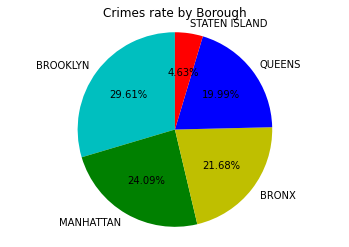

In [25]:
# Use the proportion of crime rate in each area to make a pie chart
x = top_crimes_prop['BORO_NM']
y = top_crimes_prop['propotion']
colors = ['c', 'g', 'y', 'b', 'r']

plt.pie(top_crimes_prop['propotion'], labels=top_crimes_prop['BORO_NM'], colors=colors,
        startangle=90,
        explode = (0, 0, 0,0 ,0),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Crimes rate by Borough')
plt.show()

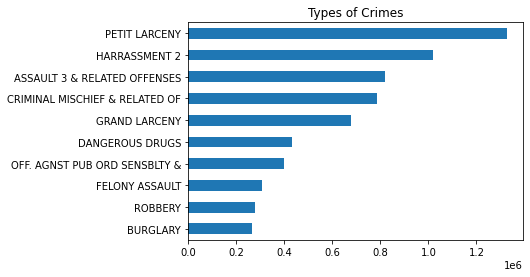

In [26]:
data_crime.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

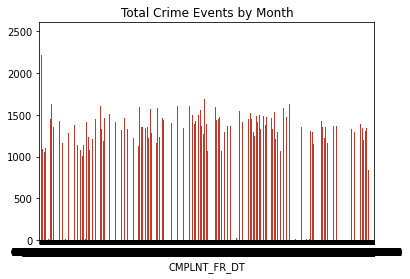

In [27]:
data_crime.groupby('CMPLNT_FR_DT').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

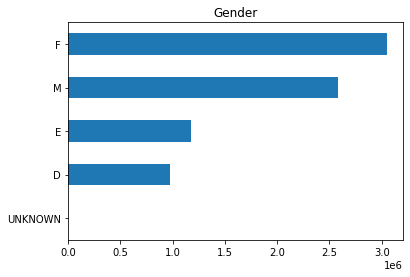

In [28]:
data_crime.VIC_SEX.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Gender")

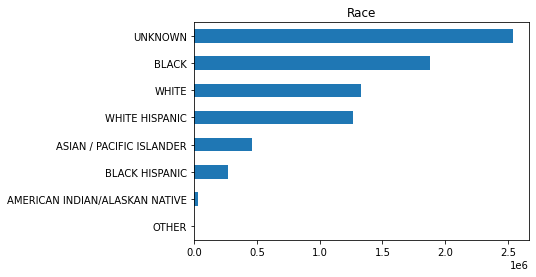

In [29]:
data_crime.VIC_RACE.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Race")

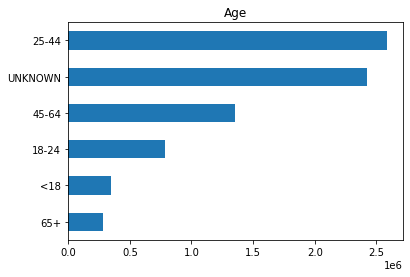

In [30]:
data_crime.VIC_AGE_GROUP.value_counts().iloc[:6].sort_values().plot(kind="barh", title = "Age")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f973a0c5510>],
      dtype=object)

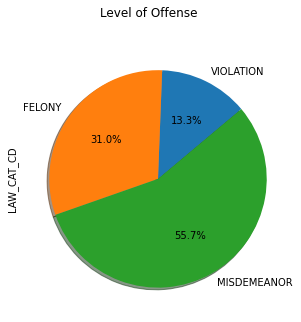

In [31]:
data_crime_clean['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

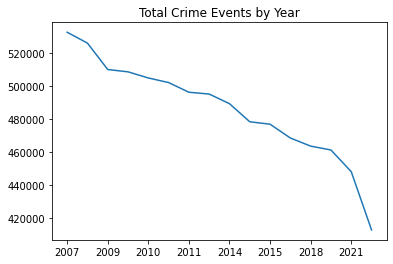

In [32]:
data_crime_clean['year'] = data_crime_clean['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
data_crime_clean['year'].value_counts().plot(kind="line", title = "Total Crime Events by Year")

In [33]:
sex_crimes = data_crime_clean[data_crime.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year
20,354566222,12/19/2019,02:50:00,12/19/2019,104,RAPE,COMPLETED,FELONY,BRONX,INSIDE,N.Y. POLICE DEPT,"1,008,798","238,971",40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",<18,BLACK HISPANIC,FEMALE,2019
23,441714270,12/06/2019,11:30:00,12/19/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,N.Y. POLICE DEPT,"984,623","209,859",40.742699,-73.998655,"(40.74269929900004, -73.99865537999993)",25-44,UNKNOWN,FEMALE,2019
32,916011284,12/15/2019,09:30:00,12/15/2019,116,SEX CRIMES,COMPLETED,FELONY,BRONX,INSIDE,N.Y. POLICE DEPT,"1,006,434","244,344",40.837324,-73.919831,"(40.83732351100008, -73.91983075699994)",<18,BLACK,FEMALE,2019
34,465522474,12/05/2019,22:00:00,12/15/2019,233,SEX CRIMES,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,N.Y. POLICE DEPT,"999,794","241,252",40.828851,-73.943834,"(40.82885104500008, -73.94383419099995)",25-44,WHITE,FEMALE,2019
38,954653095,11/15/2017,20:00:00,12/13/2019,104,RAPE,COMPLETED,FELONY,QUEENS,INSIDE,N.Y. POLICE DEPT,"1,036,790","205,267",40.729939,-73.810433,"(40.729939364000074, -73.81043314199997)",18-24,WHITE,FEMALE,2019


7360.5


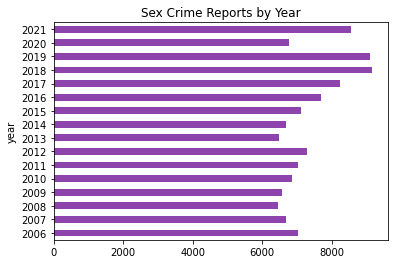

In [34]:
#plot graph
sex_crimes.groupby('year').size().plot(kind = 'barh', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = sex_crimes['year'].value_counts().mean()
print(round(mean,2))

FEMALE                   83.224645
MALE                     14.875858
UNKNOWN                   1.789960
BUSINESS/ORGANIZATION     0.109537
Name: VIC_SEX, dtype: float64


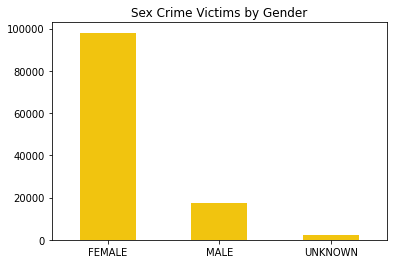

In [35]:
#plot graph
sex_crimes['VIC_SEX'].value_counts().iloc[:3].plot(kind="bar",  color = '#F1C40F', title = 'Sex Crime Victims by Gender', rot=0)

#victims by gender percentage
vic_sex_per = sex_crimes['VIC_SEX'].value_counts() / sex_crimes['VIC_SEX'].shape[0] *100
print(vic_sex_per)

BLACK                             32.663372
WHITE HISPANIC                    28.658040
WHITE                             16.543543
UNKNOWN                           10.095272
ASIAN / PACIFIC ISLANDER           6.146831
BLACK HISPANIC                     5.621221
AMERICAN INDIAN/ALASKAN NATIVE     0.269173
Name: VIC_RACE, dtype: float64


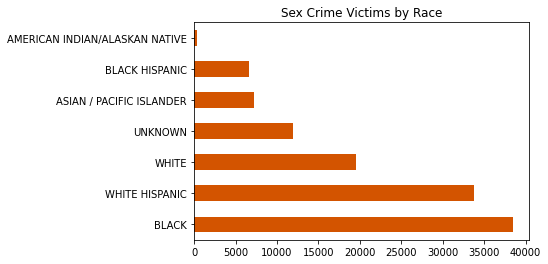

In [36]:
#plot graph
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)

<18      48.015590
25-44    23.234665
18-24    16.386455
45-64     4.997113
65+       0.594389
Name: VIC_AGE_GROUP, dtype: float64


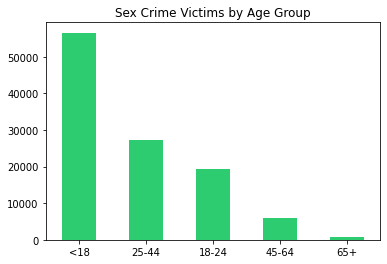

In [37]:
#plot graph
sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]].plot(kind="bar", color = '#2ECC71', title = 'Sex Crime Victims by Age Group', rot=0)

#victims by age percentage
vic_age_per = sex_crimes['VIC_AGE_GROUP'].value_counts().iloc[[0,1,2,4,5]] / sex_crimes['VIC_AGE_GROUP'].shape[0] *100
print(vic_age_per)

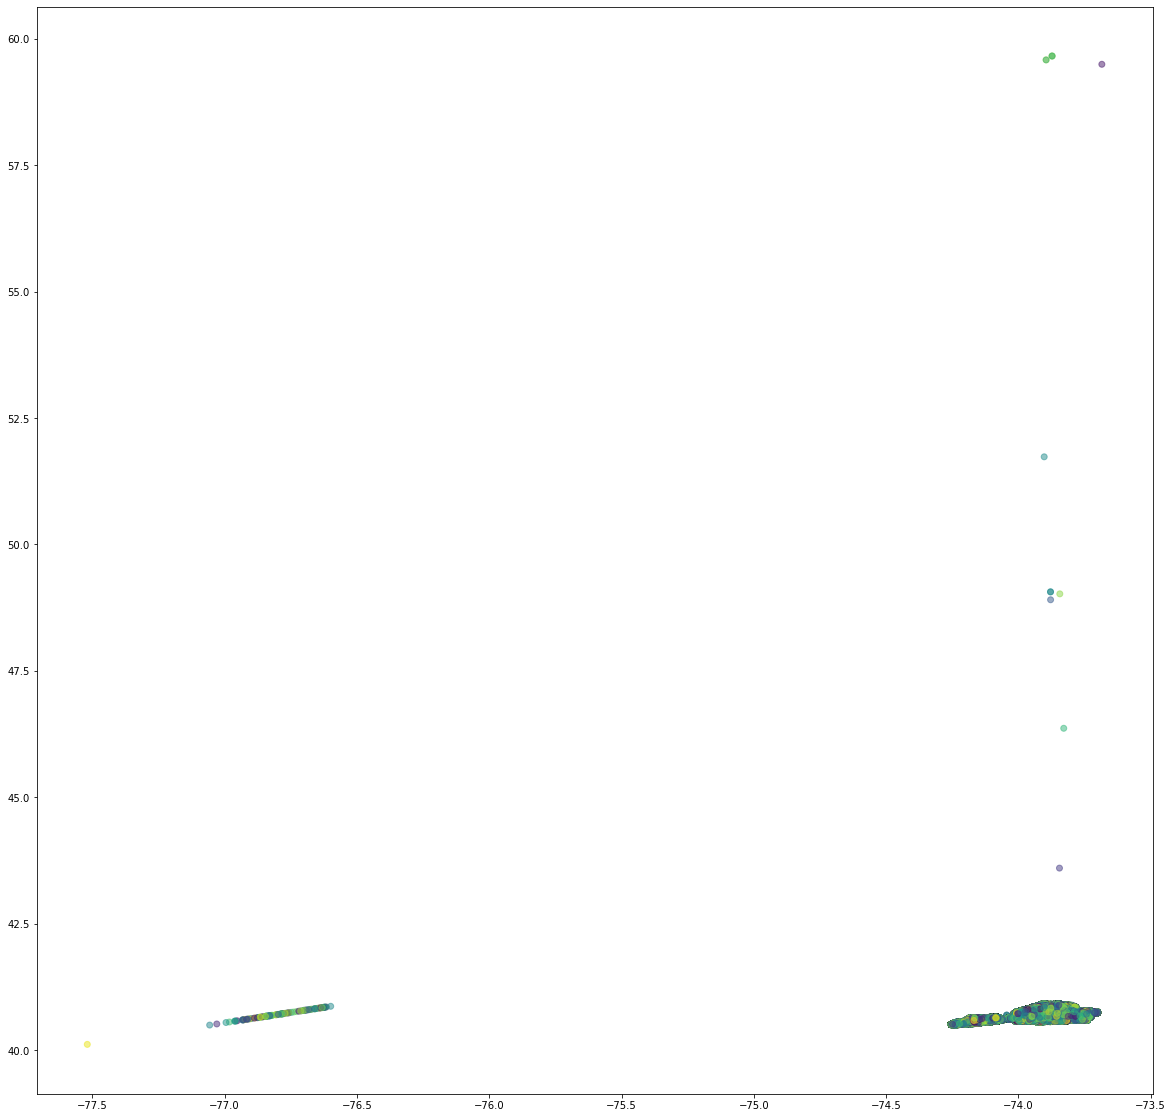

In [ ]:
colors = np.random.rand(len(data_crime['Longitude']))

plt.figure(figsize=(20,20))
plt.scatter(data_crime['Longitude'], data_crime['Latitude'],c=colors, alpha=0.5)
plt.show()

In [ ]:
#Pickup location for train dataset
import folium # goelogical map
map_1 = folium.Map(location=[40.767937,-73.982155 ],tiles='OpenStreetMap',
 zoom_start=12)
for each in crime_map[:1000].iterrows():
    folium.CircleMarker([each[1]['Latitude'],each[1]['Longitude']],
                        radius=3,
                        color='blue',
                        popup=str(each[1]['Latitude'])+','+str(each[1]['Longitude']),
                        fill_color='#FD8A6C'
                        ).add_to(map_1)
map_1


  

In [ ]:
data_crime.dropna(subset=['CMPLNT_FR_DT'], inplace=True)
data_crime.dropna(subset=['CMPLNT_FR_TM'], inplace=True)

In [ ]:
data_crime.replace('UNKNOWN', np.NaN, inplace=True)
data_crime.replace('E', np.NaN, inplace=True)
data_crime.replace('D', np.NaN, inplace=True)
data_crime.replace('U', np.NaN, inplace=True)

<AxesSubplot:title={'center':'Gender'}>

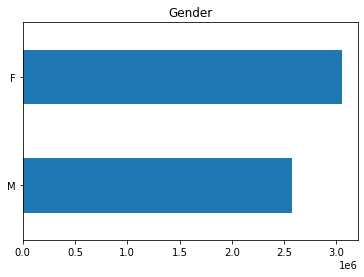

In [ ]:
data_crime.VIC_SEX.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Gender")

In [ ]:
print('Number of rows before removing rows with missing values: ' + str(data_crime.shape[0]))
data_crime.dropna(axis=0, inplace=True)
print('Number of rows after removing rows with missing values: ' + str(data_crime.shape[0]))

Number of rows before removing rows with missing values: 7776644
Number of rows after removing rows with missing values: 4237388


# change Change time format

In [ ]:
# import a new library
from datetime import datetime

In [ ]:
data_crime['CMPLNT_FR_YEAR'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
data_crime['CMPLNT_FR_YEAR'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
data_crime['CMPLNT_FR_MONTH'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[0]))
data_crime['CMPLNT_FR_DAY'] = data_crime['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[1]))
data_crime['CMPLNT_FR_HOUR'] = data_crime['CMPLNT_FR_TM'].map(lambda x: int(x.split(':')[0]))

In [ ]:
pd.unique(data_crime.CMPLNT_FR_YEAR)

array([2019, 2017, 1974, 2008, 2012, 2018, 2011, 2004, 2016, 2015, 2013,
       2009, 2001, 2010, 1994, 2014, 2020, 1983, 2003, 1991, 2005, 1978,
       1993, 2006, 1979, 1980, 2000, 1019, 1997, 1990, 1977, 1999, 1984,
       2007, 1998, 1920, 1996, 1949, 1919, 1965, 2002, 1985, 1995, 1972,
       1029, 1970, 1987, 1975, 1992, 1971, 1989, 1960, 1982, 1981, 1918,
       1018, 2021, 1021, 1921, 1986, 1973, 1966, 1955, 1976, 1988, 1914,
       1016, 1942, 1916, 1015, 1915, 1913, 1017, 1950, 1967, 1027, 1968,
       1010, 1969, 1941, 1959, 1917, 1954, 1945, 1026, 1911, 1947, 1946,
       1912, 1957, 1930, 1910, 1906, 1908, 1922, 1940, 1900, 1905, 1929,
       1909, 1962, 1961, 1956, 1948, 1938, 1964, 1028, 1951], dtype=int64)

In [ ]:
columns_remove = ['CMPLNT_FR_TM', 'CMPLNT_FR_DT','CMPLNT_FR_YEAR']
data_crime = data_crime.drop(columns_remove, axis=1)

In [ ]:
data_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237388 entries, 2 to 7825498
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   RPT_DT             object 
 2   KY_CD              int64  
 3   OFNS_DESC          object 
 4   CRM_ATPT_CPTD_CD   object 
 5   LAW_CAT_CD         object 
 6   BORO_NM            object 
 7   LOC_OF_OCCUR_DESC  object 
 8   JURIS_DESC         object 
 9   X_COORD_CD         object 
 10  Y_COORD_CD         object 
 11  Latitude           float64
 12  Longitude          float64
 13  Lat_Lon            object 
 14  VIC_AGE_GROUP      object 
 15  VIC_RACE           object 
 16  VIC_SEX            object 
 17  CMPLNT_FR_MONTH    int64  
 18  CMPLNT_FR_DAY      int64  
 19  CMPLNT_FR_HOUR     int64  
dtypes: float64(2), int64(5), object(13)
memory usage: 678.9+ MB


In [ ]:
import sklearn.datasets as sk
X, y = sk.make_classification(n_samples=290000, 
                              n_features=35, n_informative=25, n_redundant=5, n_classes=2, 
                              n_clusters_per_class=2, weights=None, random_state=1)
print(X)
print(y)

[[ -5.9872308   -3.56695376 -11.65801302 ...  -3.44968004  -0.39677568
   -1.06608796]
 [  3.01951174  -3.69748455 -13.17113699 ...   0.77379268  -5.57628982
    0.07401377]
 [  5.88110695  -2.03416581   1.56393256 ...   6.29833842  -5.39790171
    0.8052031 ]
 ...
 [  5.004134    -1.98393917  -9.91449358 ...   0.39336569  -0.57841791
   -0.449746  ]
 [ -5.684431     1.77346265   6.74468456 ...  -8.70569241  -2.43293668
    1.97098304]
 [  0.93988713   0.74992859   0.57321764 ...  -4.85624284   3.43218081
    0.06704396]]
[1 0 1 ... 1 1 1]


```
# Traning  Data
```
#20% traning 80% testing

In [ ]:
X_test = data_crime.drop('LAW_CAT_CD', axis = 1)
y_test = data_crime['LAW_CAT_CD'].copy().to_frame()
print('X shape: ' + str(X.shape))
print('y shape: ' + str(y.shape))

X shape: (290000, 35)
y shape: (290000,)


In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Randomly choose 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)# Data scaling the X set

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', X_train.shape)
print('Testing Features Shape:', y_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (232000, 35)
Training Labels Shape: (232000, 35)
Testing Features Shape: (58000,)
Testing Labels Shape: (58000,)


# Predications

# **LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Initializing the LDA estimator
lda = LinearDiscriminantAnalysis()

In [ ]:
# Performing LDA
X_lda = lda.fit_transform(X, y)

In [ ]:
lda.score(X_train, y_train)

0.8434224137931035

In [ ]:
lda.predict(X)

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
# Assigning predicted y values
y_pred = lda.predict(X)

In [ ]:
lda = lda.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
##Confusion Matrix is the number of correct and incorrect predictions made by a classifier
result = confusion_matrix(y_test, lda)
print("Confusion Matrix for Linear Discriminat Analysis :")
print(result)

Confusion Matrix for Linear Discriminat Analysis :
[[22993  6023]
 [ 3200 25784]]


In [ ]:
print(classification_report(y_true=y, 
                                y_pred=y_pred, 
                                target_names=["0", "1"]))


              precision    recall  f1-score   support

           0       0.88      0.79      0.83    145026
           1       0.81      0.89      0.85    144974

    accuracy                           0.84    290000
   macro avg       0.85      0.84      0.84    290000
weighted avg       0.85      0.84      0.84    290000





```
# **SVM**
```

# SVM

In [ ]:
from sklearn.svm import LinearSVC
svclassifier = LinearSVC(class_weight='balanced')
svclassifier.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(class_weight='balanced')

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
Classifier_predications = svclassifier.predict(X_test)
print (accuracy_score(y_test, Classifier_predications)*100)

82.65689655172413


In [ ]:
from sklearn.metrics import accuracy_score
ypred=svclassifier.predict(X_test)
accuracy = accuracy_score(y_test,ypred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, ypred)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.8265689655172413
              precision    recall  f1-score   support

           0       0.79      0.86      0.82     26685
           1       0.87      0.80      0.83     31315

    accuracy                           0.83     58000
   macro avg       0.83      0.83      0.83     58000
weighted avg       0.83      0.83      0.83     58000

Confusion matrix:
[[22821  6195]
 [ 3864 25120]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.8666850676235164


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.8551995503091625




```
### Random Forest
```

#Random Forest

In [ ]:
param_grid = {
  
    'n_estimators': [100, 200, 300, 1000,10000]
}

print (param_grid)

{'n_estimators': [100, 200, 300, 1000, 10000]}


In [ ]:
from sklearn.model_selection import GridSearchCV
# Training with Random Forest
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf , param_grid = param_grid, cv = 5, n_jobs = -1)

In [ ]:
# Make predictions for the test set
y_pred_test = rf.predict(X_test)

In [ ]:
#print classification report for model
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     29016
           1       0.98      0.99      0.98     28984

    accuracy                           0.98     58000
   macro avg       0.98      0.98      0.98     58000
weighted avg       0.98      0.98      0.98     58000



In [ ]:
probas_ = rf.fit(X_train, y_train).predict_proba(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.8551995503091625


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.8666850676235164


#LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.4795358101961552

In [ ]:
# Make predictions for the test set
y_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     29016
           1       0.98      0.99      0.98     28984

    accuracy                           0.98     58000
   macro avg       0.98      0.98      0.98     58000
weighted avg       0.98      0.98      0.98     58000




```
# GaussianNB
```
# GaussianNB

In [ ]:
#I use Gussian as GNB for short
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.8294827586206897


In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
ypred=nb.predict(X_test)
accuracy = accuracy_score(y_test,ypred)
report = classification_report(y_pred, y_test)
cm = confusion_matrix(y_test, ypred)

print("Classification report:")
print("Accuracy: ",accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.8294827586206897
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     27442
           1       0.86      0.81      0.83     30558

    accuracy                           0.83     58000
   macro avg       0.83      0.83      0.83     58000
weighted avg       0.83      0.83      0.83     58000

Confusion matrix:
[[23284  5732]
 [ 4158 24826]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.8565415401600883


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.8484804314554333


```
# KNN
```
## KNN

In [ ]:
kn = KNeighborsClassifier(n_neighbors = 5)
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = kn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9886379310344827


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[28676   340]
 [  319 28665]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29016
           1       0.99      0.99      0.99     28984

    accuracy                           0.99     58000
   macro avg       0.99      0.99      0.99     58000
weighted avg       0.99      0.99      0.99     58000



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fn)
print(specificity)

0.9889981031212278


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Sensitivity = tp / (tp+fn)
print(Sensitivity)

0.9889939276842395
